In [ ]:
import sys
sys.path.append("../../..")

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.adapters.detectors.mock import MockDetector
from src.app.parsers import parse_detector, parse_camera
from src.app.factories import build_camera

In [2]:
camera_config = {
    "type": "mock",
    "source": {
        "type": "dir",
        "path": "../../../datasets/processed/v1/train/images",
    },
    "resolution": {
        "width": 640,
        "height": 320,
    },
    "fps": 30,
}
camera_config_object = parse_camera(camera_config)
camera = build_camera(camera_config_object)
camera.open()

In [3]:
detector_config = {
    "type": "mock",
    "classes": [
        "apple",
        "cucumber",
        "grape",
        "kiwi",
        "lemon",
        "orange",
        "pear",
        "pineapple",
        "potato",
        "tomato",
        "watermelon",
    ],
    "confidence_range": (0.5, 0.95),
    "detections_num_range": (0, 5),
}
detector_config_object = parse_detector(detector_config)
detector = MockDetector(detector_config_object)

In [4]:
frame = camera.read()
detections = detector.detect(frame)

In [10]:
detections

[Detection(class_id=1, confidence=0.6585770742428407, bbox=(443, 236, 618, 316)),
 Detection(class_id=0, confidence=0.7632417485875889, bbox=(106, 241, 427, 296)),
 Detection(class_id=1, confidence=0.7731252724126476, bbox=(367, 189, 525, 238)),
 Detection(class_id=1, confidence=0.8051268727602149, bbox=(220, 271, 455, 309)),
 Detection(class_id=0, confidence=0.7745841961045827, bbox=(470, 41, 604, 121))]

(np.float64(-0.5), np.float64(639.5), np.float64(319.5), np.float64(-0.5))

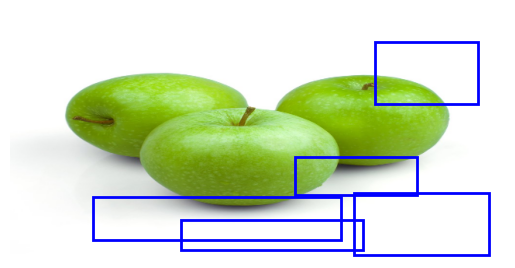

In [11]:
fig, ax = plt.subplots(1, 1)
plt.imshow(frame)

for det in detections:
    bbox = patches.Rectangle(
        xy=det.bbox[:2], 
        width=det.bbox[2] - det.bbox[0], 
        height=det.bbox[3] - det.bbox[1], 
        linewidth=2, 
        edgecolor='blue', 
        facecolor='none'
    )
    ax.add_patch(bbox)

plt.axis('off')